In [34]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [35]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8066538113245472096
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2003349385345014553
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [36]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical



In [37]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


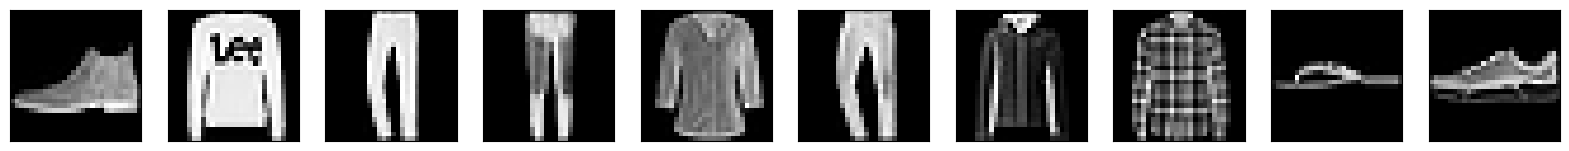

In [38]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [39]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (60000, 28, 28)
x_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


In [40]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [41]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255

In [42]:
classes=10
y_train=to_categorical(y_train,classes)
y_test=to_categorical(y_test,classes)

In [43]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (60000, 28, 28, 1)
x_test (10000, 28, 28, 1)
y_train (60000, 10)
y_test (10000, 10)


In [44]:
from keras.layers.core import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [45]:
img_rows=28
img_col=28
channels=1
classes=10
filters=(6,32,80,120)

In [46]:
model=Sequential()
model.add(Conv2D(filters[0],(3,3),padding="same",activation="relu",input_shape=(img_rows,img_col,channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[1],(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))

model.add(Dense(classes,activation="softmax"))
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="sgd")
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 80)        

In [47]:
model.fit(x_train,y_train,batch_size=64,epochs=15,validation_split=0.2,verbose=1)

Epoch 1/15
750/750 [==============================] - 15s 5ms/step - loss: 1.6511 - accuracy: 0.4475 - val_loss: 0.8812 - val_accuracy: 0.6781
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.7977 - accuracy: 0.6898 - val_loss: 0.7695 - val_accuracy: 0.7138
Epoch 3/15
750/750 [==============================] - 5s 6ms/step - loss: 0.6578 - accuracy: 0.7498 - val_loss: 0.6127 - val_accuracy: 0.7717
Epoch 4/15
750/750 [==============================] - 4s 6ms/step - loss: 0.5796 - accuracy: 0.7836 - val_loss: 0.5723 - val_accuracy: 0.7811
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.5297 - accuracy: 0.8039 - val_loss: 0.5605 - val_accuracy: 0.7852
Epoch 6/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4943 - accuracy: 0.8184 - val_loss: 0.5374 - val_accuracy: 0.7978
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.4646 - accuracy: 0.8304 - val_loss: 0.4640 - val_accuracy: 0.8357
Epoch

In [48]:
from sklearn.metrics import accuracy_score
y_pred_probs=model.predict(x_test)
y_pred=np.where(y_pred_probs>0.5,1,0)
test_accuracy=accuracy_score(y_pred,y_test)
print("test accuracy",test_accuracy)

313/313 [==============================] - 1s 2ms/step
test accuracy 0.8386


In [49]:
mask=range(20,50)
x_valid=x_test[0:20]
actual_labels=y_test[0:20]
y_pred_probs_valid=model.predict(x_valid)
y_pred=np.where(y_pred_probs_valid>0.5,1,0)

1/1 [==============================] - 0s 233ms/step


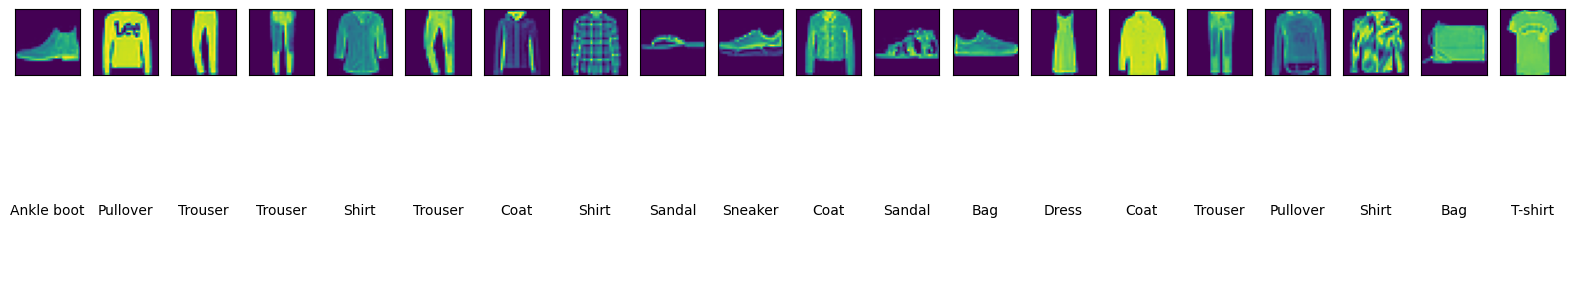

In [ ]:
import matplotlib.pyplot as plt
n=len(x_valid)
plt.figure(figsize=(20,4))
fashion_labels={
     0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_valid[i].reshape(28,28),cmap='viridis')

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  predicted_labels=fashion_labels[np.argmax(y_pred_probs_valid[i])]
  ax=plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5,str(predicted_labels),fontsize=10,ha="center",va="center")
  plt.axis('off')

plt.show()
plt.close()